### Simple Neural Network

##### Import the necessary packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# needed for the mnist data set
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.datasets import mnist

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'tensorflow'

#### Define auxiliary functions

In [ ]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return x * (1-x)

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

#### XOR

Input shape: (4, 2)
Weights 0: (2, 2)
Weights 1: (2, 1)
Error: 0.5000728989710725
Error: 0.007111284341916792
Error: 0.0049430926681095924
Error: 0.004008187665577792
Error: 0.0034574408958297264
Error: 0.0030842281772233784
Error: 0.0028100496075295347
Error: 0.002597708052221005
Error: 0.002427012010037759
Error: 0.00228593304544237


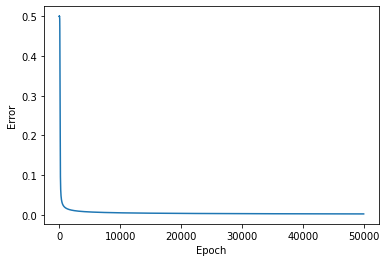

In [10]:
# input dataset
XOR = np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])

print("Input shape: {0}".format(XOR.shape))

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T

# seed random numbers to make calculation
np.random.seed(42)

# initialize weights randomly with mean 0
weights0 = np.random.randn(XOR.shape[1], 2)
weights1 = np.random.randn(2,1)

b0 = np.random.randn(2)
b1 = np.random.randn(1)

# learning rate
alpha = 5

print("Weights 0: {0}".format(weights0.shape))
print("Weights 1: {0}".format(weights1.shape))

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

errors = []

for i in range(50000):

    # forward propagation
    level0 = XOR
    level1 = sigmoid(np.dot(level0, weights0)+b0)
    level2 = sigmoid(np.dot(level1, weights1)+b1)

    # error at the last level
    level2_error = XOR_labels - level2
            
    # Backpropagation
    
    # error at the last level multiplied by the derivative of the prediction, used to scale the error:
    # if a node has too much fault for the error, its contribution is minimized
    # essentially, how much the weight1 will change
    level2_delta = level2_error * sigmoid_der(level2)

    # propagate the error to the first level by dotting the delta by first weights transposed
    # this is the error at the hidden layer
    level1_error = np.dot(level2_delta, weights1.T)
    
    # error at the first level multiplied by the derivative of the hidden layer, used to minimize the error
    # essentially, how much the weight0 will change
    level1_delta = level1_error * sigmoid_der(level1)
    
    b0_delta = np.sum(level1_delta)    
    b1_delta = np.sum(level2_delta)
    
    # update weights by the delta at each level. This propagates the errors through
    weights1 += np.dot(level1.T, level2_delta) * alpha
    weights0 += np.dot(level0.T, level1_delta) * alpha
    
    b1 += b1_delta * alpha
    b0 += b0_delta * alpha    
        
    errors.append(np.mean(np.abs(level2_error)))
    # print error after X steps
    if i%5000 == 0:
        print("Error:", np.mean(np.abs(level2_error)))
    
ax.plot(errors)

In [16]:
#Predict on the sample input
print("\nOutput of the first input After Training:\n")

level0 = XOR
level1 = sigmoid(np.dot(level0, weights0)+b0)

# predictions
level2 = sigmoid(np.dot(level1, weights1)+b1)

print(level2)


Output of the first input After Training:

[[0.00234254]
 [0.99795373]
 [0.99793656]
 [0.00221496]]


#### Classify on multiple classes using softmax

In [17]:
# we need to redefine the derivative of sigmoid to the correct formula because, for the previous example,
# we were passing the fuction a sigmoid value, and we were applying the sigmoid again. 
# That is why we previously changed it to x * (1-x).
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

One hot labels samples:

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] 
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


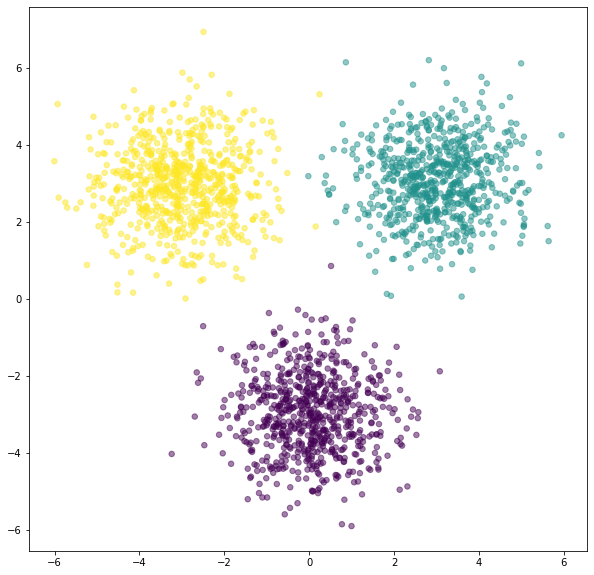

In [14]:
# Set a seed to get same random numbers
np.random.seed(42)

# this creates 3 classes clearly separated
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

# joins the classes into one np array
feature_set = np.vstack([class_1, class_2, class_3])

# creates one hot labels for the multiclass classification
classes_labels = np.array([0]*700 + [1]*700 + [2]*700)

classes_one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    classes_one_hot_labels[i, classes_labels[i]] = 1

print("One hot labels samples:\n")
print(classes_one_hot_labels[0:5], '\n', classes_one_hot_labels[700:705], '\n',
      classes_one_hot_labels[1400:1405]  )

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=classes_labels, s=30, alpha=0.5)  
plt.show()

Features 0: (2100, 2)
Weights 0: (2, 3)
Weights 1: (3, 3)
Error: 0.4992814576906227
Error: 0.005030404669743505
Error: 0.005094632799740641
Error: 0.005122916088237698
Error: 0.005146306570118685
Error: 0.004664155198055552
Error: 0.004667376035190987
Error: 0.004161691583620031
Error: 0.004142088350640979
Error: 0.0037031175688214614


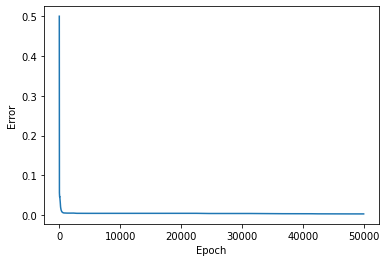

In [18]:
# initialize weights randomly 
# the network architecture is 3 input, 1 hidden layer with 3 neurons, and 3 outpus
classes_weights0 = np.random.randn(feature_set.shape[1], 3)
classes_b0 = np.random.randn(3)
classes_weights1 = np.random.randn(3, 3) 
classes_b1 = np.random.randn(3)

alpha = 0.01

print("Features 0: {0}".format(feature_set.shape))
print("Weights 0: {0}".format(classes_weights0.shape))
print("Weights 1: {0}".format(classes_weights1.shape))

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

errors = []

for i in range(50000):

    # forward propagation
    classes_level0 = feature_set #np.c_[feature_set, np.ones((feature_set.shape[0]))]
    
    classes_level1 = sigmoid(np.dot(classes_level0, classes_weights0)+classes_b0)
    
    classes_level2 = softmax(np.dot(classes_level1, classes_weights1)+classes_b1)

    # error at the last level
    classes_level2_error = classes_one_hot_labels - classes_level2

    errors.append(np.mean(np.abs(classes_level2_error)))
    
    # print error after X steps
    if i%5000 == 0:
        print("Error:", np.mean(np.abs(classes_level2_error)))
    
    # Backpropagation
    classes_level2_delta = classes_level2_error * sigmoid_der(classes_level2)
    classes_level1_error = np.dot(classes_level2_delta, classes_weights1.T)  
    classes_level1_delta = classes_level1_error * sigmoid_der(classes_level1)
    
    classes_b1_delta = np.sum(classes_level2_delta)
    classes_b0_delta = np.sum(classes_level1_delta)
    
    # update weights
    classes_weights1 += np.dot(classes_level1.T, classes_level2_delta) * alpha
    classes_weights0 += np.dot(classes_level0.T, classes_level1_delta) * alpha
    
    classes_b1 += classes_b1_delta* alpha
    classes_b0 += classes_b0_delta* alpha
    
ax.plot(errors)

In [19]:
 # forward propagation to predict on a new input
classes_level0 = np.array([[6,6]])
    
classes_level1 = sigmoid(np.dot(classes_level0, classes_weights0)+classes_b0)

classes_level2 = softmax(np.dot(classes_level1, classes_weights1)+classes_b1)

result = [round(data, 6) for data in classes_level2[0]]

print(result)

[0.001429, 0.998571, 0.0]


#### Classify hand drawn digits from the mnist data set

In [20]:
# load the images from the keras mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

NameError: name 'mnist' is not defined

In [0]:
# Standardize the images

# flatten arrays: turns the 28 by 28 images, into 784 by 1 images.
# this allows the input to be passed to the network
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# one hot encoding
digits_one_hot_labels = to_categorical(train_labels)

In [ ]:
# initialize the weights
# the network architecture is 784 inputs, 2 hidden layers, 10 ouputs (one for every digit)
# the first hidden layer has 64 nodes, and the second has 32
digits_weights0 = np.random.randn(train_images.shape[1], 64)
digits_b0 = np.random.randn(64)

digits_weights1 = np.random.randn(64, 32)
digits_b1 = np.random.randn(32)

digits_weights2 = np.random.randn(32, 10) 
digits_b2 = np.random.randn(10)

alpha = 0.001

print("Features 0: {0}".format(train_images.shape))
print("Weights 0: {0}".format(digits_weights0.shape))
print("Weights 1: {0}".format(digits_weights1.shape))
print("Weights 2: {0}".format(digits_weights2.shape))

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

errors = []

# only training on 5000 images to speed up the process
for i in range(1000):

    # forward propagation
    digits_level0 = train_images[0:5000] #np.c_[feature_set, np.ones((feature_set.shape[0]))]
    
    digits_level1 = sigmoid(np.dot(digits_level0, digits_weights0)+digits_b0)
    
    digits_level2 = sigmoid(np.dot(digits_level1, digits_weights1)+digits_b1)
    
    digits_level3 = softmax(np.dot(digits_level2, digits_weights2)+digits_b2)

    # error at the last level
    digits_level3_error = digits_one_hot_labels[0:5000] - digits_level3

    errors.append(np.mean(np.abs(digits_level3_error)))
    
    # print error after X steps
    if i%100 == 0:
        print("Error:", np.mean(np.abs(digits_level3_error)))
    
    # Backpropagation
    digits_level3_delta = digits_level3_error * sigmoid_der(digits_level3)
    
    digits_level2_error = np.dot(digits_level3_delta, digits_weights2.T)
        
    digits_level2_delta = digits_level2_error * sigmoid_der(digits_level2)
    digits_level1_error = np.dot(digits_level2_delta, digits_weights1.T)  
    digits_level1_delta = digits_level1_error * sigmoid_der(digits_level1)
    
    digits_b2_delta = np.sum(digits_level3_delta)
    digits_b1_delta = np.sum(digits_level2_delta)
    digits_b0_delta = np.sum(digits_level1_delta)
    
    # update weights
    digits_weights2 += np.dot(digits_level2.T, digits_level3_delta) * alpha
    digits_weights1 += np.dot(digits_level1.T, digits_level2_delta) * alpha
    digits_weights0 += np.dot(digits_level0.T, digits_level1_delta) * alpha
    
    digits_b2 += digits_b2_delta* alpha
    digits_b1 += digits_b1_delta* alpha
    digits_b0 += digits_b0_delta* alpha
    
ax.plot(errors)


Predictions vs labels:
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Errors:
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


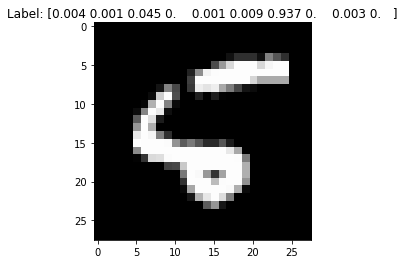

In [24]:
# predict on the first 1000 test images
digits_level0 = test_images[0:1000] 
    
digits_level1 = sigmoid(np.dot(digits_level0, digits_weights0)+digits_b0)

digits_level2 = sigmoid(np.dot(digits_level1, digits_weights1)+digits_b1)

digits_level3 = softmax(np.dot(digits_level2, digits_weights2)+digits_b2)

# create one hot encoding on the test data
one_hot_test_labels = to_categorical(test_labels[0:1000])

np.set_printoptions(precision=3, suppress= True)

# turn predictions to one hot encoding labels
predictions = np.copy(digits_level3)
predictions[predictions > 0.5] = 1
predictions[predictions < 0.5] = 0

print("\nPredictions vs labels:")
for pred, label in zip(predictions, one_hot_test_labels[0:10]):
    print(pred, label)

error_predictions = []
for index, (prediction, label) in enumerate(zip(predictions[0:10], one_hot_test_labels[0:10])):
    if not np.array_equal(prediction,label):
        error_predictions.append((index, prediction, label))

print("\nErrors:")
for index, pred, label in error_predictions:
    print(index, pred, label)

f, axes = plt.subplots()

# displays one of the misclassified images. It predicted a 6, but it was a 5
plt.title("Label: " + str(digits_level3[8]))
plt.imshow(test_images[8].reshape(28,28), cmap="gray")